# Ejercicio 14

## Enunciado
Crea un programa que:

1. Obtenga los datos acerca del COVID-19 de [esta enlance](https://covid19.isciii.es/resources/serie_historica_acumulados.csv).
2. Cree una gráfica con el total de casos acumulados en tu comunidad autónoma a nivel diarío de color **rojo**.

## Extra
3. Añada a la gráfica el total diario de España en color **azul**.

### ¿Qué cosas nuevas necesitamos saber?
- Iterando sobre objetos. Las funciones **map()** y **filter()**.
- Uso de fechas. El tipo **datetime()**.
- Visualización de datos. La librería **matplotlib**.

### Iterando sobre objetos. Las funciones **map()** y **filter()**.

La función **map()** es aquella que dada una función y una colección de objetos, aplica esa función a cada elemento de la colección.

No obstante, la función map no devuelve los resultados, si no que devueleve un iterador. Para obtener los resultados, deberemos de iterar sobre el iterador (valga la redundancia).

Veamos unos ejemlos:

In [1]:
numeros = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # definimos nuestra lista de ejemplo

In [2]:
# y la función cuadrado, que dado un número, nos devuelve ese número al cuadrado
def cuadrado(n):
    return n*n

In [3]:
# nos ayudamos de la función map para aplicar la función a todos los elementos
numeros_al_cuadrado = map(cuadrado, numeros)

In [4]:
# como hemos comentado, esto no nos muestra los números, ya que para ello hemos de iterar sobre el resultado
print(numeros_al_cuadrado)

In [5]:
# esto, en cambio, si lo hace
for numero in numeros_al_cuadrado:
    print(numero)

0
1
4
9
16
25
36
49
64
81
100


Este comportamiento se debe a que la función map no calcula el resultado de aplicar la función a cada elemento de la colección hasta que no le es necesario hacerlo.

In [6]:
# si necesitamos tener los datos calculados por algo en especial, podemos hacer lo siguiente
numeros_al_cuadrado = list(map(cuadrado, numeros)) # usamos la conversión a list para que calcule cada elemento
print(numeros_al_cuadrado)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


La función **filter()** es aquella que dada una función que devuelve un **bool** y una colección de objetos, filtra la colección para aquellos elementos cuya evaluación de la función es True.

De igual manera que sucede con **map()**, necesitaremos iterar sobre el resultado para comprobar el resultado.

In [7]:
def es_par(n):
    return n % 2 == 0

In [8]:
pares = filter(es_par, numeros)

In [9]:
print(pares)

In [10]:
for numero in pares:
    print(numero)

0
2
4
6
8
10


Hay que tener en cuenta que, en ambos casos, una vez terminada la iteración, no quedan elementos los que aplicar la función, por lo que si queremos hacer uso del elemento que hemos creado, habrá que calcularlo de nuevo.

Ilustremos esto:

In [11]:
# esto no va a hacer nada, porque ya imprimimos todos los pares antes
for numero in pares:
    print(numero)

In [12]:
# en cambio, si lo recalculamos, entonces si:
pares = filter(es_par, numeros)
for numero in pares:
    print(numero)

0
2
4
6
8
10


### Uso de fechas. El tipo **datetime()**.

El tipo datetime() nos permite crear objetos referentes a momentos en el tiempo. Para poder utilizarla, debemos importarla desde la libreria con el mismo nombre.

Podemos generar momento a partir del constructor de la clase o a partir de textos, veamos como:

In [13]:
# primero importamos la librería
from datetime import datetime

In [14]:
date1 = datetime(year=2020, month=4, day=5, hour=0, minute=0, second=0)
date2 = datetime(year=2020, month=4, day=4)
print(date1, date2)

2020-04-05 00:00:00 2020-04-04 00:00:00


Los distintos parámetros de la clase los podéis encontrar [aquí](https://docs.python.org/3/library/datetime.html#datetime.datetime).

Además, tambien podemos crear objetos del tipo **datetime()** a partir del tipo **str()**.

Veamos como:

In [15]:
fecha_str = "2020-06-30"
fecha = datetime.strptime(fecha_str, "%Y-%m-%d") # utilizamos la función strptime con el formato de nuestra fecha
# para convertirlo a datetime
print(type(fecha), fecha)

<class 'datetime.datetime'> 2020-06-30 00:00:00


En [este enlance](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior) podeís encontrar que simboliza cada % que se le pasa a la función strptime dentro del parámetro.

En cualquier caso, veamos un par de ejemplos de conversión más:

In [16]:
print(datetime.strptime("2020-06-30", "%Y-%m-%d"))
print(datetime.strptime("2020-30-06", "%Y-%d-%m"))
print(datetime.strptime("2020/30/06", "%Y/%d/%m"))
print(datetime.strptime("2020/06/30 15:30", "%Y/%m/%d %H:%M"))

2020-06-30 00:00:00
2020-06-30 00:00:00
2020-06-30 00:00:00
2020-06-30 15:30:00


### Visualización de datos. La librería **matplotlib**.

Antes de poder utilizar la librería **matplotlib** debemos instalarla. Para ello, el comando es el siguiente:
```console
pip install -U matplotlib
```

**NOTA**: Recuerda ejecutar la consola como administrador en el caso de Windows o preceder el comando de **sudo** en el caso de Linux/MacOS.

In [17]:
# una vez instalada, realizaremos el siguiente import junto con la sentencia que vemos a continuación
# para poder visualizar nuestros datos en el propio notebook
from matplotlib import pyplot as plt
%matplotlib inline

Antes de comenzar, supongamos que queremos estudiar la rentabilidad de nuestro último móvil. Para ello veremos lo que nos habrá costado el movil cada día en función del tiempo que lo hayamos tenido. Para ello supondremos que el móvil nos costó 600 euros hace exactamente 730 días.

In [18]:
precio = 600
dias_de_uso = 730

In [19]:
# ahora crearemos los valores de los ejes X e Y
x = range(1, dias_de_uso + 1) # para conocer el día que estamos utilizando como referencia
y = [precio/dias for dias in x] # para calcular lo que nos ha costado el movil al día en función de los días que lo hemos usado

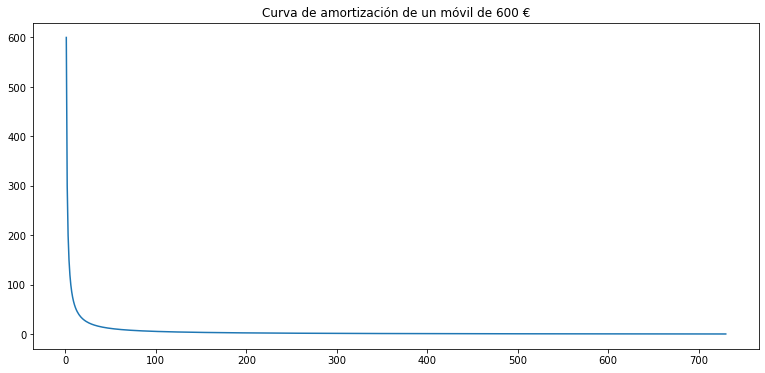

In [20]:
# una vez creados nuestros datos, los mostraremos visualmente
plt.figure(figsize=(13, 6)) # con esto determinamos el tamaño de nuestro gráfico
plt.title("Curva de amortización de un móvil de 600 €") # con esto añadimos título a nuestro gráfico
plt.plot(x,y) # así añadimos los valores
plt.show() # así mostramos el gráfico

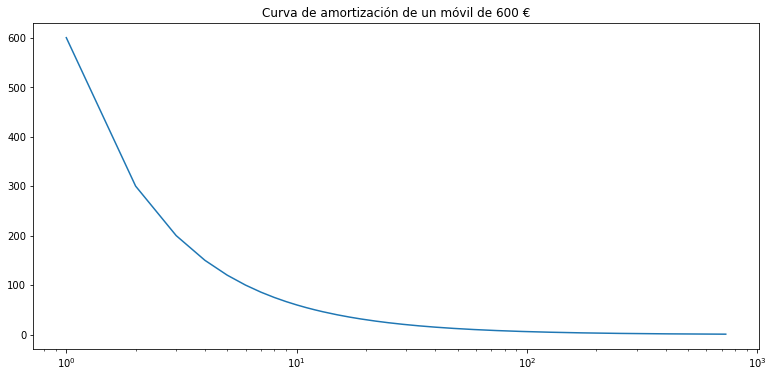

In [21]:
# Como podemos comprobar, debido a las escalas de los datos, apenas apreciamos nada
# modifiquemos la escala del eje X para que en vez de ir de 1 en 1, vaya en potencias de 10
plt.figure(figsize=(13, 6)) 
plt.title("Curva de amortización de un móvil de 600 €")
plt.plot(x,y) 
plt.xscale('log') # así ponemos nuestro gráfico en escala logarítmica
plt.show()

Como podemos comprobar, ahora observamos mucho mejor que la mayor amotización se realiza entre los días 1 y 10, ya que el precio por día pasa de 600 euros al día (1 día) a 60 euros al día (10 días).

Podríamos ademas conocer la estimación del próximo año calculando los valores y añadiéndolos a nuestro gráfico en un color distinto.

Veamos como:

In [22]:
x2 = range(dias_de_uso + 1, dias_de_uso + 365 + 1)
y2 = [precio/dias for dias in x2]

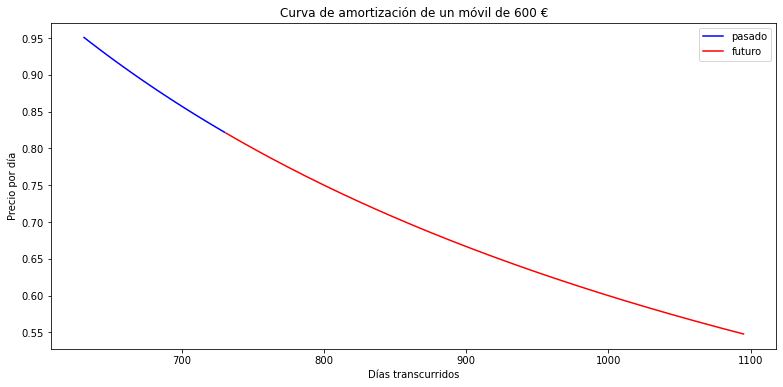

In [23]:
# en vez de imprimir todos los valores de x e y, para poder obtener mayor detalle visual, imprimiremos solo los 100 últimos
plt.figure(figsize=(13, 6)) 
plt.title("Curva de amortización de un móvil de 600 €")
plt.plot(x[-100:],y[-100:], color='blue', label='pasado') # añadimos la primera parte con color azul y etiquetada como pasado
plt.plot(x2, y2, color='red', label='futuro')  # y la segunda de rojo como futuro
plt.legend() # con esto añadimos la leyenda con los valores de label
plt.xlabel("Días transcurridos") # y así añadimos etiquetas a los ejes
plt.ylabel("Precio por día") # y así añadimos etiquetas a los ejes
plt.show()

Eso es todo, a por el ejercicio!

## Solución

In [24]:
import requests

In [25]:
from datetime import datetime

In [26]:
from matplotlib import pyplot as plt

In [27]:
%matplotlib inline

In [28]:
data = requests.get("https://covid19.isciii.es/resources/serie_historica_acumulados.csv").text

In [29]:
registros = data.splitlines()

Analicemos que pinta tienen los datos:

In [30]:
for reg in registros[:5]:
    print(reg)

CCAA Codigo ISO,Fecha,Casos ,Hospitalizados,UCI,Fallecidos,Recuperados,
AN,20/02/2020,,,,,,
AR,20/02/2020,,,,,,
AS,20/02/2020,,,,,,
IB,20/02/2020,1,,,,,


In [31]:
for reg in registros[-5:]:
    print(reg)

NC,05/04/2020,3231,1432,124,187,380,
PV,05/04/2020,8810,4794,410,548,3568,
RI,05/04/2020,2719,888,66,141,964,
NOTA: El objetivo de los datos que se publican en esta web es saber el número de casos acumulados a la fecha y que por tanto no se puede deducir que la diferencia entre un día y el anterior es el número de casos nuevos ya que esos casos pueden haber sido recuperados de fechas anteriores Cualquier inferencia que se haga sobre las diferencias de un día para otro deben hacerse con precaución y son únicamente la responsabilidad el autor,,,,,,,
Los datos de estas comunidades son datos de prevalencia (personas ingresadas a fecha de hoy) No reflejan el total de personas que han sido hospitalizadas o ingresadas en UCI  a lo largo del periodo de notificación(CL-CM-MD-VC-MC),,,


Vemos que hay texto al principio y al final de los datos, por lo que filtraremos aquellos registros que comienzan por un código de 2 letas.

In [32]:
def registro_valido(registro):
    return len(registro.split(",")[0]) == 2

real_data = list(filter(registro_valido, registros))

Ahora creemos una función para adecuar los registros a lo que queramos:

In [33]:
def format_reg(reg):
    splitted = reg.split(",")
    reg_as_dict = {
        'ccaa': splitted[0],
        'date': datetime.strptime(splitted[1], '%d/%m/%Y'),
        'cases': int(splitted[2]) if splitted[2] else 0,
        'in_hospital': int(splitted[3]) if splitted[3] else 0,
        'in_UCI': int(splitted[4]) if splitted[4] else 0,
        'deats': int(splitted[5]) if splitted[5] else 0,
        'recovered': int(splitted[6]) if splitted[6] else 0
    }
    return reg_as_dict

In [34]:
formatted_data = list(map(format_reg, real_data))

Con los datos ya formateados, ya solo queda coger los registros de nuestra CCAA y pintarlos:

In [35]:
my_ccaa = 'MD'

In [36]:
def from_ccaa(reg):
    return reg.get("ccaa") == my_ccaa

In [37]:
my_ccaa_data = list(filter(from_ccaa, formatted_data))

In [38]:
x = [reg.get('date') for reg in my_ccaa_data]
y = [reg.get('cases') for reg in my_ccaa_data]

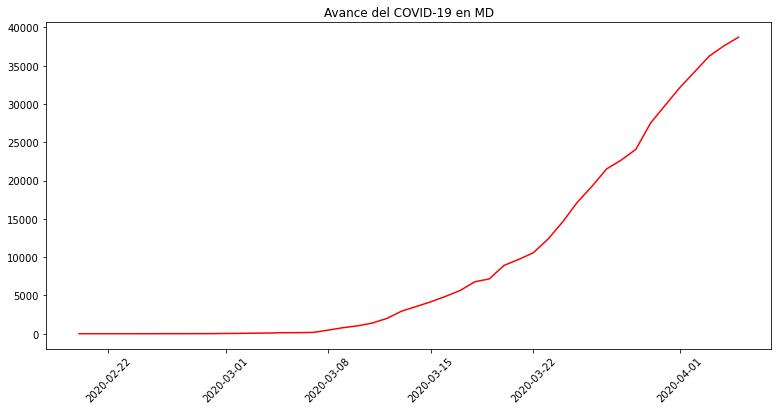

In [39]:
plt.figure(figsize=(13,6))
plt.title(f"Avance del COVID-19 en {my_ccaa}")
plt.xticks(rotation=45)
plt.plot(x, y, color='red')
plt.show()

Ahora, para hacer el extra, crearemos una función que dada una seríe de registros, genera un diccionario con el total de casos acumulados por fecha.

Para ello, primero inicializamos cada fecha a 0 casos para posteriormente ir sumando los que coincidan con la fecha en cuestión:

In [40]:
def total(regs):
    data = {reg.get('date'): 0 for reg in regs}
    for reg in regs:
        data[reg.get('date')] = data.get(reg.get('date')) + reg.get('cases')
    return data

In [41]:
spain_data = total(formatted_data)

In [42]:
x2, y2 = list(spain_data.keys()), list(spain_data.values())

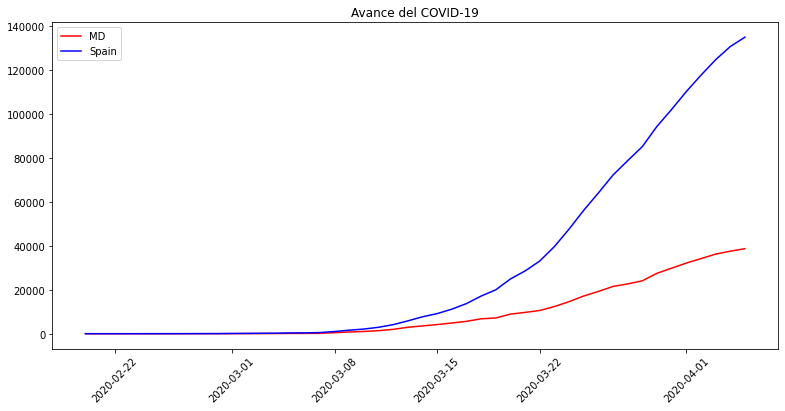

In [43]:
plt.figure(figsize=(13,6))
plt.title(f"Avance del COVID-19")
plt.xticks(rotation=45)
plt.plot(x, y, color='red', label=my_ccaa)
plt.plot(x2, y2, color='blue', label="Spain")
plt.legend()
plt.show()